In [ ]:
                                     FORECASTING EXCHANGE RATES USING TIME SERIES 
                                                ANALYSIS ASSIGNMENT

In [10]:
import pandas as pd 
df = pd.read_csv("exchange_rate.csv")
data =df 
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB
None


In [3]:
print(df.shape)

(7588, 2)


In [11]:
print(data.head())

               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849


In [5]:
# Data Exploration & Preprocessing 
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
df = pd.read_csv("exchange_rate.csv")   
#  Exploratory Data Analysis 
print("\nColumn names:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())



Column names: ['date', 'Ex_rate']

Missing values:
 date       0
Ex_rate    0
dtype: int64


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("exchange_rate.csv")
 # Missing Values
missing = df['Ex_rate'].isnull().sum()
print(f"\nTotal missing values: {missing}")

if missing > 0:
    df['Ex_rate'] = df['Ex_rate'].interpolate(method='linear')


Total missing values: 0



Descriptive Statistics:
count    7588.000000
mean        0.776974
std         0.136620
min         0.483297
25%         0.701422
50%         0.761377
75%         0.873477
max         1.102536
Name: Ex_rate, dtype: float64


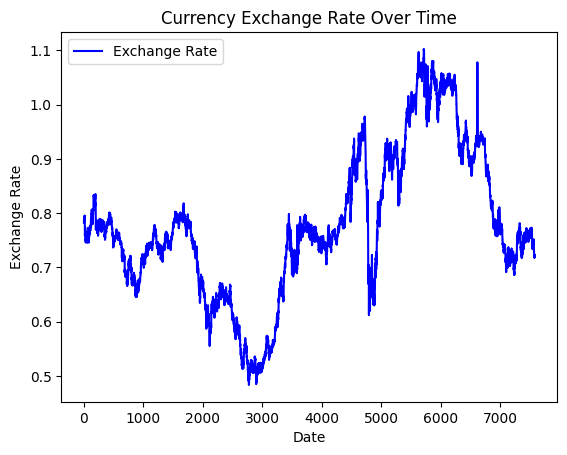

In [7]:
#  Initial Exploration
print("\nDescriptive Statistics:")
print(df['Ex_rate'].describe())
# Plot 
plt.figure()
plt.plot(df.index, df['Ex_rate'], color="blue", label="Exchange Rate")
plt.title("Currency Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()


In [22]:
# model building - ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
df = pd.read_csv("exchange_rate.csv")
#  (ADF Test)
result = adfuller(df['Ex_rate'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if result[1] > 0.05:
    print("Series is NOT stationary → Differencing needed")
else:
    print("Series is stationary → No differencing needed")
df['Ex_rate_diff'] = df['Ex_rate'].diff().dropna()

ADF Statistic: -1.6649941807381343
p-value: 0.44923273535979974
Series is NOT stationary → Differencing needed


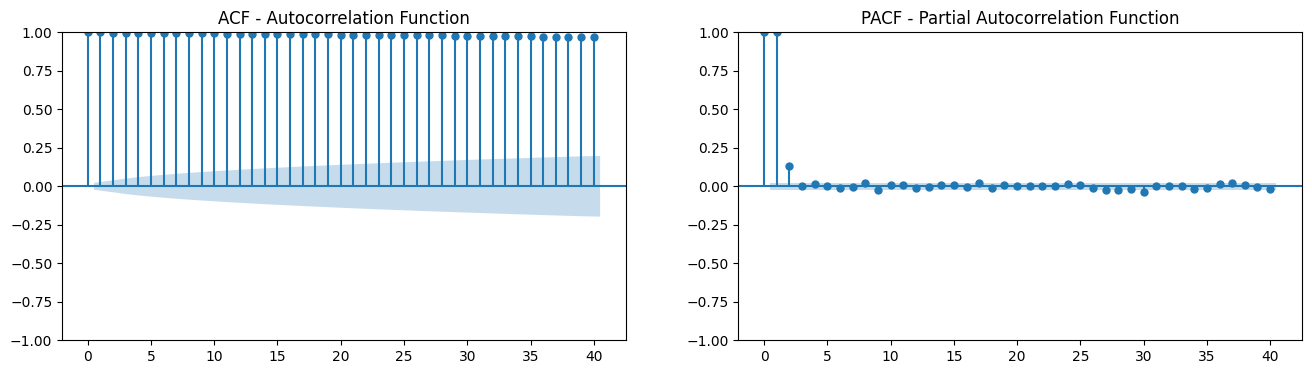

In [11]:
#  Plot ACF & PACF 
fig, ax = plt.subplots(1,2, figsize=(16,4))
plot_acf(df['Ex_rate'].dropna(), ax=ax[0], lags=40)
ax[0].set_title("ACF - Autocorrelation Function")

plot_pacf(df['Ex_rate'].dropna(), ax=ax[1], lags=40, method="ywm")
ax[1].set_title("PACF - Partial Autocorrelation Function")

plt.show()

In [12]:
#  Fit ARIMA Model
# Example: ARIMA(1,1,1) 
p, d, q = 1, 1, 1
model = ARIMA(df['Ex_rate'], order=(p,d,q))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Tue, 16 Sep 2025   AIC                         -56102.322
Time:                        10:59:19   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

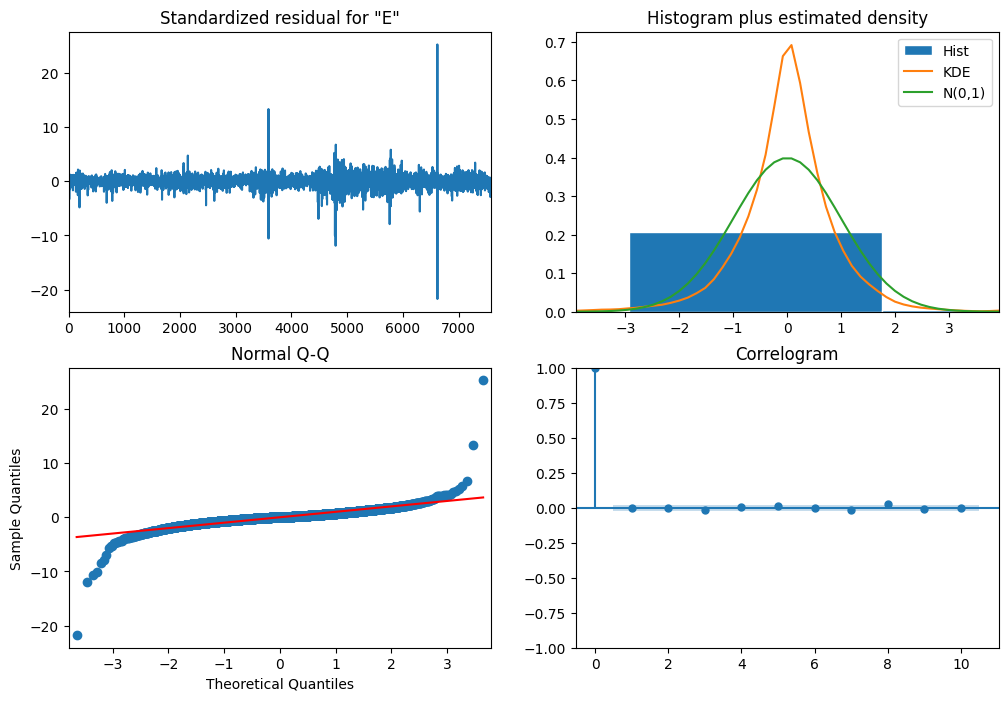

In [13]:
#  Diagnostics
model_fit.plot_diagnostics(figsize=(12,8))
plt.show()

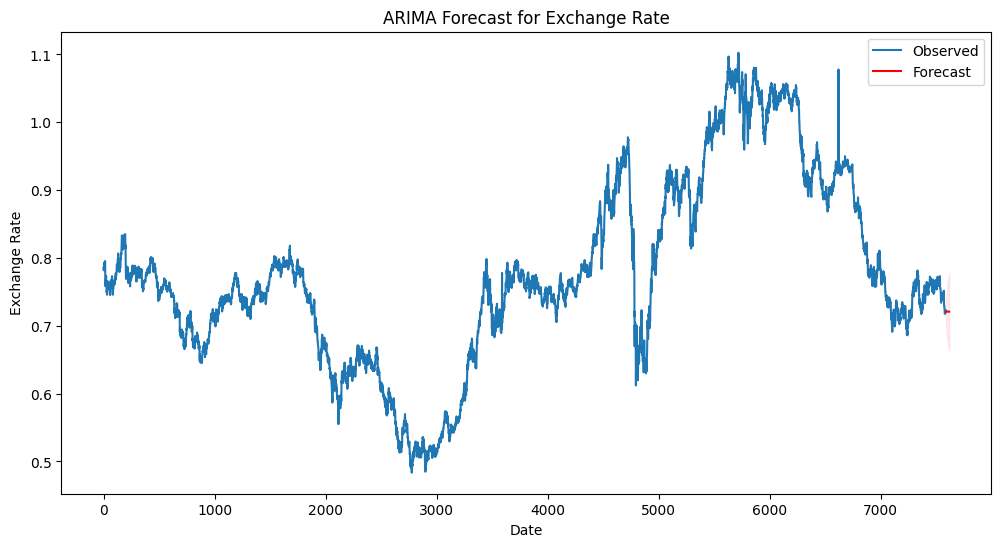

In [14]:
#  Forecasting
# Forecast next 30 days
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Plot forecast
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Ex_rate'], label="Observed")
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label="Forecast", color="red")
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1], color='pink', alpha=0.3)
plt.title("ARIMA Forecast for Exchange Rate")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

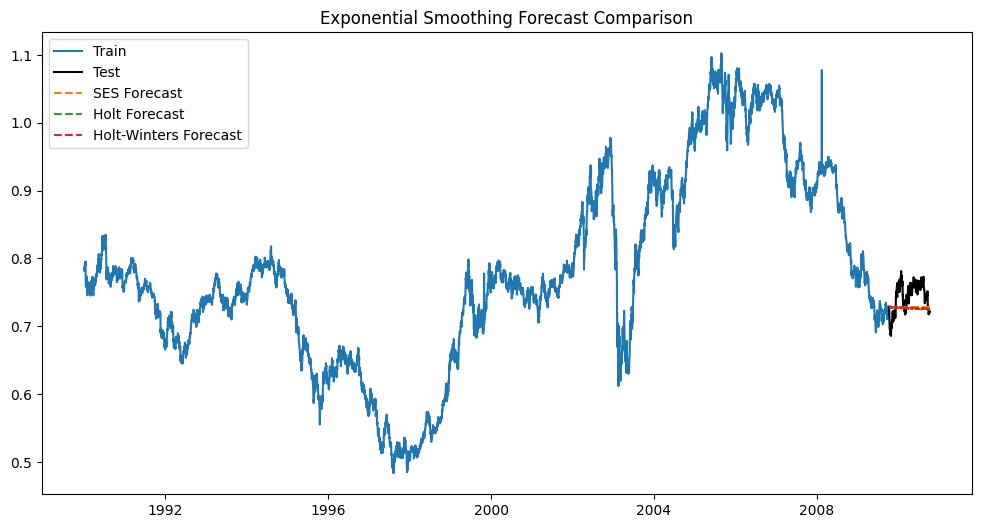

In [16]:
# Exponential Smoothing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

df = pd.read_csv("exchange_rate.csv")
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df.set_index('date', inplace=True)
df = df.asfreq('D')
df['Ex_rate'] = df['Ex_rate'].interpolate()

# Train-Test Split 
train = df.iloc[:-365]   
test = df.iloc[-365:]    

#  Simple Exponential Smoothing 
ses = SimpleExpSmoothing(train['Ex_rate']).fit()
ses_forecast = ses.forecast(len(test))

# Holt’s Linear Trend Method 
holt = ExponentialSmoothing(train['Ex_rate'], trend="add").fit()
holt_forecast = holt.forecast(len(test))

#  Holt-Winters 
hw = ExponentialSmoothing(train['Ex_rate'], trend="add", seasonal="add", seasonal_periods=30).fit()
hw_forecast = hw.forecast(len(test))

#  Plot 
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Ex_rate'], label="Train")
plt.plot(test.index, test['Ex_rate'], label="Test", color="black")
plt.plot(test.index, ses_forecast, label="SES Forecast", linestyle="--")
plt.plot(test.index, holt_forecast, label="Holt Forecast", linestyle="--")
plt.plot(test.index, hw_forecast, label="Holt-Winters Forecast", linestyle="--")
plt.legend()
plt.title("Exponential Smoothing Forecast Comparison")
plt.show()


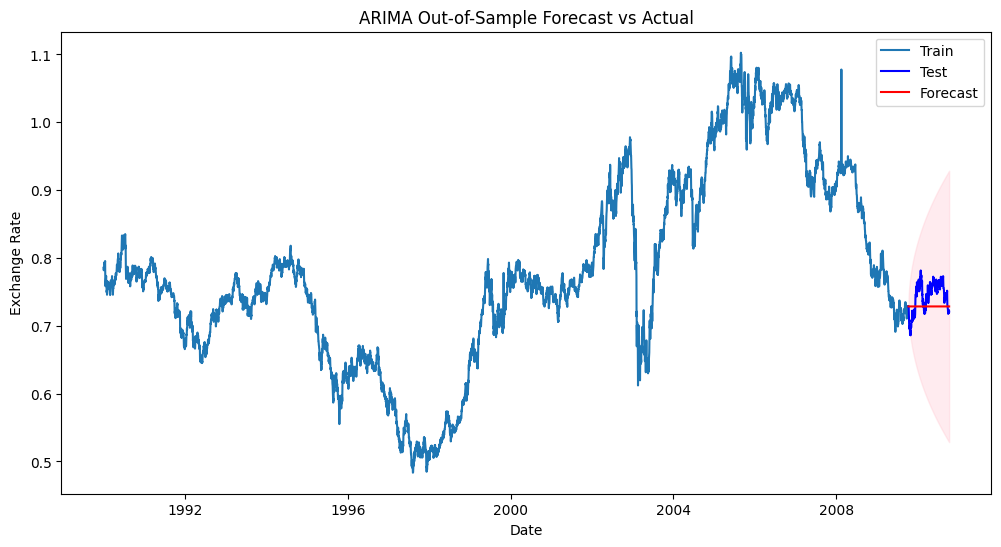

In [17]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
#  ARIMA 
model = ARIMA(train, order=(1,1,1)).fit()

# Forecast with confidence interva
forecast_res = model.get_forecast(steps=len(test))
forecast_mean = forecast_res.predicted_mean
forecast_ci = forecast_res.conf_int()
forecast_mean.index = test.index
forecast_ci.index = test.index

#  Plot actual vs predicted 
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color="blue")
plt.plot(test.index, forecast_mean, label="Forecast", color="red")

plt.fill_between(test.index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1], color='pink', alpha=0.3)

plt.title("ARIMA Out-of-Sample Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()


In [18]:
# evaluation and comparision
from sklearn.metrics import mean_absolute_error, mean_squared_error
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape_val = mape(y_true, y_pred)
    return {"Model": name, "MAE": mae, "RMSE": rmse, "MAPE": mape_val}


Train=6070, Val=759, Test=759
ADF p-value: 0.7601827946372041 -> using d = 1
ARIMA        | MAE=0.272811, RMSE=0.274602, MAPE=36.569%
SES          | MAE=0.272716, RMSE=0.274508, MAPE=36.556%
Holt         | MAE=0.287634, RMSE=0.289837, MAPE=38.565%
Holt-Winters | MAE=0.287760, RMSE=0.289963, MAPE=38.582%


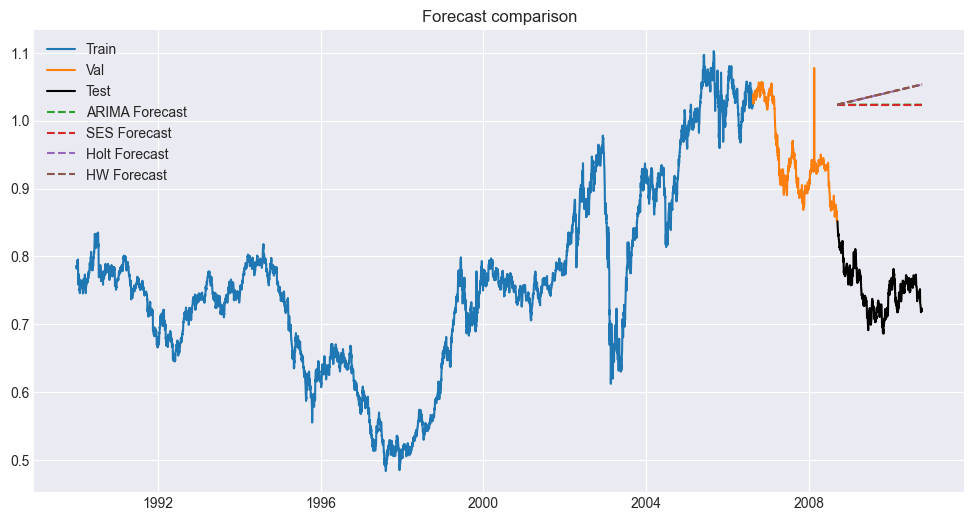

In [12]:
#Main execution flow
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    plt.style.use("seaborn-v0_8-darkgrid")  # works for newer matplotlib
except:
    try:
        plt.style.use("seaborn-darkgrid")   # works for older matplotlib
    except:
        plt.style.use("ggplot")             # fallback style
plt.rcParams['figure.figsize'] = (12,6)

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Utility 
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
df = pd.read_csv("exchange_rate.csv")
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y %H:%M")
df = df.set_index('date').asfreq('D')
df['Ex_rate'] = df['Ex_rate'].interpolate()

series = df['Ex_rate']

#  Train/Val/Test split 
n = len(series)
train, val, test = series[:int(0.8*n)], series[int(0.8*n):int(0.9*n)], series[int(0.9*n):]

print(f"Train={len(train)}, Val={len(val)}, Test={len(test)}")

#  ARIMA 
adf_p = adfuller(train)[1]
d = 0 if adf_p < 0.05 else 1
print("ADF p-value:", adf_p, "-> using d =", d)

arima = ARIMA(train, order=(1,d,1)).fit()
arima_fc = arima.get_forecast(len(test)).predicted_mean
arima_fc.index = test.index

# SES 
ses = SimpleExpSmoothing(train).fit()
ses_fc = ses.forecast(len(test))
ses_fc.index = test.index

#  Holt 
holt = ExponentialSmoothing(train, trend="add").fit()
holt_fc = holt.forecast(len(test))
holt_fc.index = test.index

#  Holt-Winters 
try:
    hw = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=7).fit()
    hw_fc = hw.forecast(len(test))
    hw_fc.index = test.index
except:
    hw_fc = None

#  Evaluation 
def eval_and_print(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mp = mape(y_true, y_pred)
    print(f"{name:12s} | MAE={mae:.6f}, RMSE={rmse:.6f}, MAPE={mp:.3f}%")
    return {"MAE":mae,"RMSE":rmse,"MAPE":mp}

results = {}
results['ARIMA'] = eval_and_print("ARIMA", test, arima_fc)
results['SES']   = eval_and_print("SES", test, ses_fc)
results['Holt']  = eval_and_print("Holt", test, holt_fc)
if hw_fc is not None:
    results['HW'] = eval_and_print("Holt-Winters", test, hw_fc)
# plot
plt.plot(train, label="Train")
plt.plot(val, label="Val")
plt.plot(test, label="Test", color='black')
plt.plot(arima_fc, '--', label="ARIMA Forecast")
plt.plot(ses_fc, '--', label="SES Forecast")
plt.plot(holt_fc, '--', label="Holt Forecast")
if hw_fc is not None:
    plt.plot(hw_fc, '--', label="HW Forecast")
plt.legend()
plt.title("Forecast comparison")
plt.show()


In [1]:
import itertools
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_score, best_params = float("inf"), None

for param in pdq:
    try:
        model = ARIMA(train, order=param)
        model_fit = model.fit()
        predictions = model_fit.forecast(len(test))
        rmse = np.sqrt(mean_squared_error(test, predictions))
        if rmse < best_score:
            best_score, best_params = rmse, param
    except:
        continue

print("Best ARIMA params:", best_params, "with RMSE:", best_score)


Best ARIMA params: None with RMSE: inf


In [2]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

best_score, best_params = float("inf"), None
trend_options = [None, 'add', 'mul']
seasonal_options = [None, 'add', 'mul']

for trend in trend_options:
    for seasonal in seasonal_options:
        try:
            model = ExponentialSmoothing(
                train,
                trend=trend,
                seasonal=seasonal,
                seasonal_periods=12  # adjust as per data
            )
            model_fit = model.fit()
            predictions = model_fit.forecast(len(test))
            rmse = np.sqrt(mean_squared_error(test, predictions))
            if rmse < best_score:
                best_score, best_params = rmse, (trend, seasonal)
        except:
            continue

print("Best Exponential Smoothing params:", best_params, "with RMSE:", best_score)


Best Exponential Smoothing params: None with RMSE: inf


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, mape

def evaluate_model(data, train_size=0.7, val_size=0.15):
    n = len(data)
    train_end = int(train_size * n)
    val_end = int((train_size + val_size) * n)
    train, val, test = data[:train_end], data[train_end:val_end], data[val_end:]
    results = {}

    #  ARIMA 
    best_rmse = float("inf")
    best_order, best_model = None, None
    for p in range(3):
        for d in range(2):
            for q in range(3):
                try:
                    model = ARIMA(train, order=(p,d,q)).fit()
                    pred = model.forecast(steps=len(val))
                    mae, rmse, mape = evaluate(val, pred)
                    if rmse < best_rmse:
                        best_rmse = rmse
                        best_order = (p,d,q)
                        best_model = model
                except:
                    continue
    # Final test forecast
    forecast = best_model.forecast(steps=len(test))
    results["ARIMA"] = evaluate(test, forecast)

    #  Exponential Smoothing
    best_rmse = float("inf")
    best_cfg, best_model = None, None
    for trend in [None, 'add']:
        for seasonal in [None, 'add']:
            try:
                model = ExponentialSmoothing(train,
                                             trend=trend,
                                             seasonal=seasonal,
                                             seasonal_periods=12).fit()
                pred = model.forecast(len(val))
                mae, rmse, mape = evaluate(val, pred)
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_cfg = (trend, seasonal)
                    best_model = model
            except:
                continue
    forecast = best_model.forecast(len(test))
    results["ExponentialSmoothing"] = evaluate(test, forecast)

    return results

series = np.random.randn(200).cumsum()  

results = evaluate_model(series)

for model, (mae, rmse, mape) in results.items():
    print(f"{model:20s} | MAE={mae:.3f}, RMSE={rmse:.3f}, MAPE={mape:.2f}%")


ARIMA                | MAE=2.259, RMSE=2.730, MAPE=56.87%
ExponentialSmoothing | MAE=5.336, RMSE=5.488, MAPE=138.90%
